In [50]:
import os
import pandas as pd
import numpy as np

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# %config InlineBackend.figure_format = 'png'
plt.style.use('seaborn-v0_8-pastel')

In [166]:
# URLs for the CSV files
# url_csv_A = "https://raw.githubusercontent.com/radiukpavlo/transition-matrix-ml/main/mnist/mnist_matrix_A.csv"
# url_csv_B = "https://raw.githubusercontent.com/radiukpavlo/transition-matrix-ml/main/mnist/mnist_matrix_B.csv"

PATH_CSV = '../mnist/'
PATH_FIGURES = '.\projects_temp-figs'
PATH_FIGURES_SEPARATE = '.\projects_temp-figs\projects_temp-figs_separate'
FIGURE_FORMAT = 'svg'

# Read the CSV files into pandas dataframes
df_matrix_A_train = pd.read_csv(f"{PATH_CSV}/mnist_matrix_A_train.csv")
df_matrix_B_train = pd.read_csv(f"{PATH_CSV}/mnist_matrix_B_train.csv")

df_matrix_A_test = pd.read_csv(f"{PATH_CSV}/mnist_matrix_A_test.csv")
df_matrix_B_test = pd.read_csv(f"{PATH_CSV}/mnist_matrix_B_test.csv")

In [52]:
# df_matrix_A_train

In [53]:
# df_matrix_B_train

## 1. Data Preparation

In [54]:
matrix_A_train = df_matrix_A_train.drop(df_matrix_A_train.columns[0], axis=1)
matrix_A_test = df_matrix_A_test.drop(df_matrix_A_test.columns[0], axis=1)

In [55]:
# Extract the first column for unique IDs
matrix_A_unique_id_train = matrix_A_train.iloc[:, 0].to_frame()
matrix_A_unique_id_test = matrix_A_test.iloc[:, 0].to_frame()

# Extract the remaining columns for matrix A
matrix_A_final_train = matrix_A_train.iloc[:, 1:]
matrix_A_final_test = matrix_A_test.iloc[:, 1:]

# Extract the first column for unique IDs
matrix_B_unique_id_train = df_matrix_B_train.iloc[:, 0].to_frame()
matrix_B_unique_id_test = df_matrix_B_test.iloc[:, 0].to_frame()

# Extract the second column for labels
matrix_B_labels_train = df_matrix_B_train.iloc[:, 1].to_frame()
matrix_B_labels_test = df_matrix_B_test.iloc[:, 1].to_frame()

# Extract the remaining columns for matrix_B_final
matrix_B_final_train = df_matrix_B_train.iloc[:, 2:]
matrix_B_final_test = df_matrix_B_test.iloc[:, 2:]

In [56]:
# matrix_B_final_test

In [57]:
# matrix_B_final_train

In [58]:
# Test matrices A

# matrix_A_final_train = [[3, -2, -3, 1.5, 0.6],
#                   [-1, -3, 1.5, 0.6, 1],
#                   [1, -1, 0.844444444, -0.444444444, -3]]

# matrix_A_final_train = [[2.80, -1.80, -2.80, 1.30, 0.40],
#                   [3.00, -2.00, -3.00, 1.50, 0.60],
#                   [3.20, -2.20, -3.20, 1.70, 0.80],
#                   [-1.60, -2.50, 1.50, 0.20, 0.60],
#                   [-1.00, -3.00, 1.50, 0.60, 1.00],
#                   [-0.50, -3.50, 1.90, 1.00, 1.40],
#                   [1.20, -1.20, 0.70, -0.30, -2.80],
#                   [1.00, -1.00, 0.84, -0.44, -3.00],
#                   [0.80, -0.80, 0.90, -0.50, -3.20]]

# matrix_A_final_train = [[-1.827506713, -2.57210291],
#                   [-1.805637206, -2.789008261],
#                   [-1.812439839, -2.99995456],
#                   [-2.035782748, -2.999989808],
#                   [-2.225907357, -2.999830184],
#                   [2.151465808, 2.349428929],
#                   [2.146415535, 1.848879366],
#                   [2.335563856, 1.572769993],
#                   [2.512780867, 1.350090422],
#                   [2.808853361, 1.168351448],
#                   [-2.397040617, 2.674381769],
#                   [-2.415455455, 2.889854745],
#                   [-2.508854802, 2.999784436],
#                   [-2.621571267, 2.999927152],
#                   [-2.71963759, 2.998711285]]


In [59]:
# Test matrices B
# matrix_B_final_train = [[-1.843907868, 1.99818664, -1.912855282, -1.97511053],
#                   [1.992023578, -1.923804827, 0.706593926, -1.543784398],
#                   [1.107744254, 1.615475549, 1.723582196, 1.807614602]]

# matrix_B_final_train = [[-1.979394104, 1.959307524, -1.381119943, -1.729640979],
#                   [-1.843907868, 1.99818664, -1.912855282, -1.97511053],
#                   [-1.999365095, 1.998896097, -1.999605076, -1.998916765],
#                   [1.997775859, -1.844000202, 1.660111333, -1.373532039],
#                   [1.992023578, -1.923804827, 0.706593926, -1.543784398],
#                   [1.997854305, -1.999410881, -0.243400633, -1.827587263],
#                   [0.851626415, 1.574201387, 1.581026838, 1.573934081],
#                   [1.107744254, 1.615475549, 1.723582196, 1.807614602],
#                   [1.290406093, 1.695289797, 1.953503509, 1.946250271]]

# matrix_B_final_train = [[2.8, -1.8, -2.8, 1.3, 0.4],
#                   [2.9, -1.9, -2.9, 1.4, 0.5],
#                   [3, -2, -3, 1.5, 0.6],
#                   [3.1, -2.1, -3.1, 1.6, 0.7],
#                   [3.2, -2.2, -3.2, 1.7, 0.8],
#                   [-1.6, -2.5, 1.5, 0.2, 0.6],
#                   [-1.3, -2.7, 1.3, 0.4, 0.8],
#                   [-1, -3, 1.5, 0.6, 1],
#                   [-0.7, -3.2, 1.7, 0.8, 1.2],
#                   [-0.5, -3.5, 1.9, 1, 1.4],
#                   [1.2, -1.2, 0.7, -0.3, -2.8],
#                   [1.1, -1.1, 0.8, -0.4, -2.9],
#                   [1, -1, 0.844444444, -0.444444444, -3],
#                   [0.9, -0.9, 0.85, -0.45, -3.1],
#                   [0.8, -0.8, 0.9, -0.5, -3.2]]


In [60]:
df_matrix_A_final_train = pd.DataFrame(matrix_A_final_train)
df_matrix_A_final_test = pd.DataFrame(matrix_A_final_test)

In [61]:
# df_matrix_A_final_train

In [62]:
# df_matrix_A_final_test

## 2. Calculate Determinant

In [63]:
# 1. Calculate the transpose of matrix_A_final
matrix_A_final_train_transpose = df_matrix_A_final_train.transpose()

# 2. Calculate the multiplication of matrix_A_final and matrix_A_final_transpose
matrix_A_final_train_mmult = np.dot(df_matrix_A_final_train.values, matrix_A_final_train_transpose.values)

# 3. Calculate the determinant of matrix_A_final_mmult
matrix_A_final_train_determinant = np.linalg.det(matrix_A_final_train_mmult)

print(matrix_A_final_train_determinant)


-0.0


## 3. Calculate Transition Matrix

### 3.1. Singular Value Decomposition (SVD)

In [64]:
# Receive values from the matrix A DataFrame 
matrix_A_final_train_values = df_matrix_A_final_train.values

# Calculate SVD
U, s, Vt = np.linalg.svd(matrix_A_final_train_values)

# Construct the full diagonal matrix
S = np.zeros(matrix_A_final_train_values.shape)
for i in range(min(matrix_A_final_train_values.shape)):
    S[i, i] = s[i]

print("U:\n", U)
print("\nS:\n", S)
print("\nVt:\n", Vt)


U:
 [[-1.54780666e-02 -1.41638927e-02  1.05845736e-02 ...  1.51258614e-04
  -2.17958598e-03 -4.62022689e-03]
 [-1.15935035e-02 -1.66897114e-02 -1.30926663e-02 ...  2.26793933e-03
   5.59471096e-04 -5.30190927e-04]
 [-9.33083688e-03 -3.83937507e-03  9.78539366e-03 ...  3.04485946e-05
   1.26249841e-03  1.96165521e-03]
 ...
 [-9.55440523e-03  1.18578646e-02 -1.75987392e-03 ...  9.75921408e-01
   5.41127891e-04 -1.89074361e-03]
 [-5.94360502e-03  8.26395932e-03  1.10433637e-02 ...  7.41224033e-04
   9.89223751e-01  8.71814853e-04]
 [-8.44349374e-03 -1.11604347e-02 -6.24253571e-03 ... -1.12488788e-03
   8.54547750e-04  9.73988783e-01]]

S:
 [[974.27194538   0.           0.         ...   0.           0.
    0.        ]
 [  0.         457.404426     0.         ...   0.           0.
    0.        ]
 [  0.           0.         388.3576877  ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.  

In [65]:
U.shape

(10000, 10000)

### 3.2. Create the reconstructed matrix of SVD

In [66]:
# Recompute the original matrix using U, S, and Vt
reconstructed_matrix = U.dot(S.dot(Vt))

# Convert the reconstructed matrix to a pandas DataFrame, if desired
reconstructed_df = pd.DataFrame(reconstructed_matrix)


In [67]:
# reconstructed_df

### 3.3. Calculate the generalized inverse of Matrix A

In [68]:
# Calculate the generalized (Moore-Penrose) inverse
matrix_A_final_train_pinv = np.linalg.pinv(df_matrix_A_final_train.values)

# Convert to a pandas DataFrame, if desired
matrix_A_final_train_pinv_df = pd.DataFrame(matrix_A_final_train_pinv)


In [69]:
# matrix_A_final_train_pinv_df

### 3.4. Calculate transition matrix T

In [70]:
transition_matrix_T = matrix_A_final_train_pinv_df.dot(matrix_B_final_train)

In [71]:
# transition_matrix_T

## 4. Fomal Model → Mental Model

### Calculate new Mental Model

In [72]:
# formal_model_test = [[2.8, -1.8, -2.8, 1.3, 0.4],
#                      [2.9, -1.9, -2.9, 1.4, 0.5],
#                      [3, -2, -3, 1.5, 0.6],
#                      [3.1, -2.1, -3.1, 1.6, 0.7],
#                      [3.2, -2.2, -3.2, 1.7, 0.8],
#                      [-1.6, -2.5, 1.5, 0.2, 0.6],
#                      [-1.3, -2.7, 1.3, 0.4, 0.8],
#                      [-1, -3, 1.5, 0.6, 1],
#                      [-0.7, -3.2, 1.7, 0.8, 1.2],
#                      [-0.5, -3.5, 1.9, 1, 1.4],
#                      [1.2, -1.2, 0.7, -0.3, -2.8],
#                      [1.1, -1.1, 0.8, -0.4, -2.9],
#                      [1, -1, 0.844444444, -0.444444444, -3],
#                      [0.9, -0.9, 0.85, -0.45, -3.1],
#                      [0.8, -0.8, 0.9, -0.5, -3.2]]
# 
# mental_model_test = [[-1.979394104, 1.959307524, -1.381119943, -1.729640979],
#                      [-1.974921385, 1.94850558, -1.726609792, -1.761213024],
#                      [-1.843907868, 1.99818664, -1.912855282, -1.97511053],
#                      [-1.998625355, 1.999671808, -1.998443276, -1.999764956],
#                      [-1.999365095, 1.998896097, -1.999605076, -1.998916765],
#                      [1.997775859, -1.844000202, 1.660111333, -1.373532039],
#                      [1.818753218, -1.909687734, 1.206631506, -1.407994628],
#                      [1.992023578, -1.923804827, 0.706593926, -1.543784398],
#                      [1.999174385, -1.997592083, 0.21221635, -1.586974171],
#                      [1.997854305, -1.999410881, -0.243400633, -1.827587263],
#                      [0.851626415, 1.574201387, 1.581026838, 1.573934081],
#                      [1.008512576, 1.570791652, 1.595657199, 1.741761976],
#                      [1.107744254, 1.615475549, 1.723582196, 1.807614602],
#                      [1.089897991, 1.611369928, 1.882537367, 1.873522151],
#                      [1.290406093, 1.695289797, 1.953503509, 1.946250271]]
# 
# df_formal_model_test = pd.DataFrame(formal_model_test)
# df_mental_model_test = pd.DataFrame(mental_model_test)

In [73]:
matrix_B_calculated_train = df_matrix_A_final_train.values.dot(transition_matrix_T.values)
matrix_B_calculated_test = df_matrix_A_final_test.values.dot(transition_matrix_T.values)

# matrix_B_calculated_train = df_formal_model_test.values.dot(transition_matrix_T.values)

In [74]:
# matrix_B_calculated_test

In [75]:
# matrix_B_final_test

In [76]:
matrix_B_calculated_train_df = pd.DataFrame(matrix_B_calculated_train)
matrix_B_calculated_test_df = pd.DataFrame(matrix_B_calculated_test)

matrix_B_calculated_train_df.to_csv('.\projects_temp-data\matrix_B_calculated_train.csv', index=False)
matrix_B_calculated_test_df.to_csv('.\projects_temp-data\matrix_B_calculated_test.csv', index=False)
matrix_B_final_train.to_csv('.\projects_temp-data\matrix_B_final_train.csv', index=False)
matrix_B_final_test.to_csv('.\projects_temp-data\matrix_B_final_test.csv', index=False)

### Calculate the Euclidean distance

In [77]:
# Calculate Euclidean distance for each row
euclidean_distances_train = np.sqrt(((matrix_B_final_train.values - matrix_B_calculated_train) ** 2).sum(axis=1))
euclidean_distances_test = np.sqrt(((matrix_B_final_test.values - matrix_B_calculated_test) ** 2).sum(axis=1))

# euclidean_distances_train = np.sqrt(((df_mental_model_test - matrix_B_calculated) ** 2).sum(axis=1))

# Sum of all the Euclidean distances
total_distance_train = euclidean_distances_train.sum()
total_distance_test = euclidean_distances_test.sum()

In [78]:
print(f"For train data, the total Euclidean distance is {total_distance_train}")
print(f"For test data, the total Euclidean distance is {total_distance_test}")

For train data, the total Euclidean distance is 34547.9559834357
For test data, the total Euclidean distance is 3626.3680550360205


## 5. Results

### 5.1. Visualizing Digits

In [79]:
def plot_mnist(input_data, num_to_display, save_path, true_labels=None, input_indices=None, label_data='original', show_images=True):
    """

    :param show_images: 
    :param input_data: 
    :param num_to_display: 
    :param save_path: 
    :param input_indices: 
    :param label_data: 
    :param true_labels: 
    """
    global labels_to_plot
    max_columns = 5  # Maximum number of images in one row

    # Define the figure name and path
    figure_name = f'my_digits_{label_data}'
    my_save_path = os.path.join(save_path, figure_name + f'.{FIGURE_FORMAT}')

    # Check the type of data and convert accordingly
    if isinstance(input_data, pd.DataFrame):
        data_array = input_data.to_numpy()
    elif isinstance(input_data, np.ndarray):
        data_array = input_data
    else:
        raise TypeError("Input data must be either a pandas DataFrame or a numpy array.")

    # Check if 'input_indices' is provided
    if input_indices:
        # Verify the length of 'input_indices' matches 'num_to_display'
        if len(input_indices) != num_to_display:
            # If not, raise a ValueError indicating the mismatch
            raise ValueError("Length of 'input_indices' should match 'num_to_display'")
    
        # Check if any of the indices are out of bounds (negative or beyond the length of data_array)
        if any(item < 0 or item >= len(data_array) for item in input_indices):
            # If any index is out of bounds, raise a ValueError
            raise ValueError("'input_indices' contain invalid values. Ensure all are in the range [0, len(data_array)-1].")
    
        # Use 'input_indices' to select specific data points from 'data_array'
        data_to_plot = data_array[input_indices]
    
        # If 'true_labels' is provided (not None)
        if true_labels is not None:
            # Check if 'true_labels' is a pandas DataFrame or Series
            if isinstance(true_labels, (pd.DataFrame, pd.Series)):
                # If so, use '.iloc' to select labels by position
                labels_to_plot = true_labels.iloc[input_indices]
            else:
                # If not, use list indexing (works for lists and numpy arrays)
                labels_to_plot = true_labels[input_indices]
    else:
        # If 'input_indices' is not provided, select the first 'num_to_display' data points
        data_to_plot = data_array[:num_to_display]
    
        # If 'true_labels' is provided
        if true_labels is not None:
            # Select the first 'num_to_display' labels
            labels_to_plot = true_labels[:num_to_display]


    # Calculate the number of rows and columns to display
    num_rows = (num_to_display // max_columns) + int(num_to_display % max_columns > 0)
    num_cols = min(num_to_display, max_columns)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows), dpi=300,
                             subplot_kw={'aspect': 'equal'})

    # If there's only 1 row, axes is a 1D array, we make it 2D for consistent indexing
    if num_rows == 1:
        axes = np.expand_dims(axes, axis=0)

    for idx, ax in enumerate(axes.ravel()):
        if idx >= len(data_to_plot):
            ax.axis("off")  # Turn off the axis if no data to display
            continue
        # Reshape the flattened image into 28x28
        img = data_to_plot[idx].reshape(28, 28)
        ax.imshow(img, cmap="gray")
        ax.axis("off") # Turn off the axis numbers

        # Add the true label annotation
        if labels_to_plot is not None:
            # Convert labels to a numpy array for reliable indexing
            if isinstance(labels_to_plot, pd.DataFrame) or isinstance(labels_to_plot, pd.Series):
                labels_to_plot = labels_to_plot.to_numpy()

            # Extract label value and format text
            label = labels_to_plot[idx]
            if hasattr(label, 'item'):
                label = label.item()  # Convert numpy types to Python scalar
            label_text = f"True label: {label}"
            
            ax.text(0.02, 0.98,
                    label_text, 
                    color='red',
                    fontweight='bold',
                    fontsize=14,
                    ha='left',
                    va='top',
                    transform=ax.transAxes)

    plt.tight_layout(pad=0.2, w_pad=0.3, h_pad=0.7)
    plt.savefig(my_save_path, format=FIGURE_FORMAT)
    # Show the plot if show_images is True
    if show_images:
        plt.show()

    # Close the figure to free up memory regardless of whether it was displayed
    plt.close(fig)
    

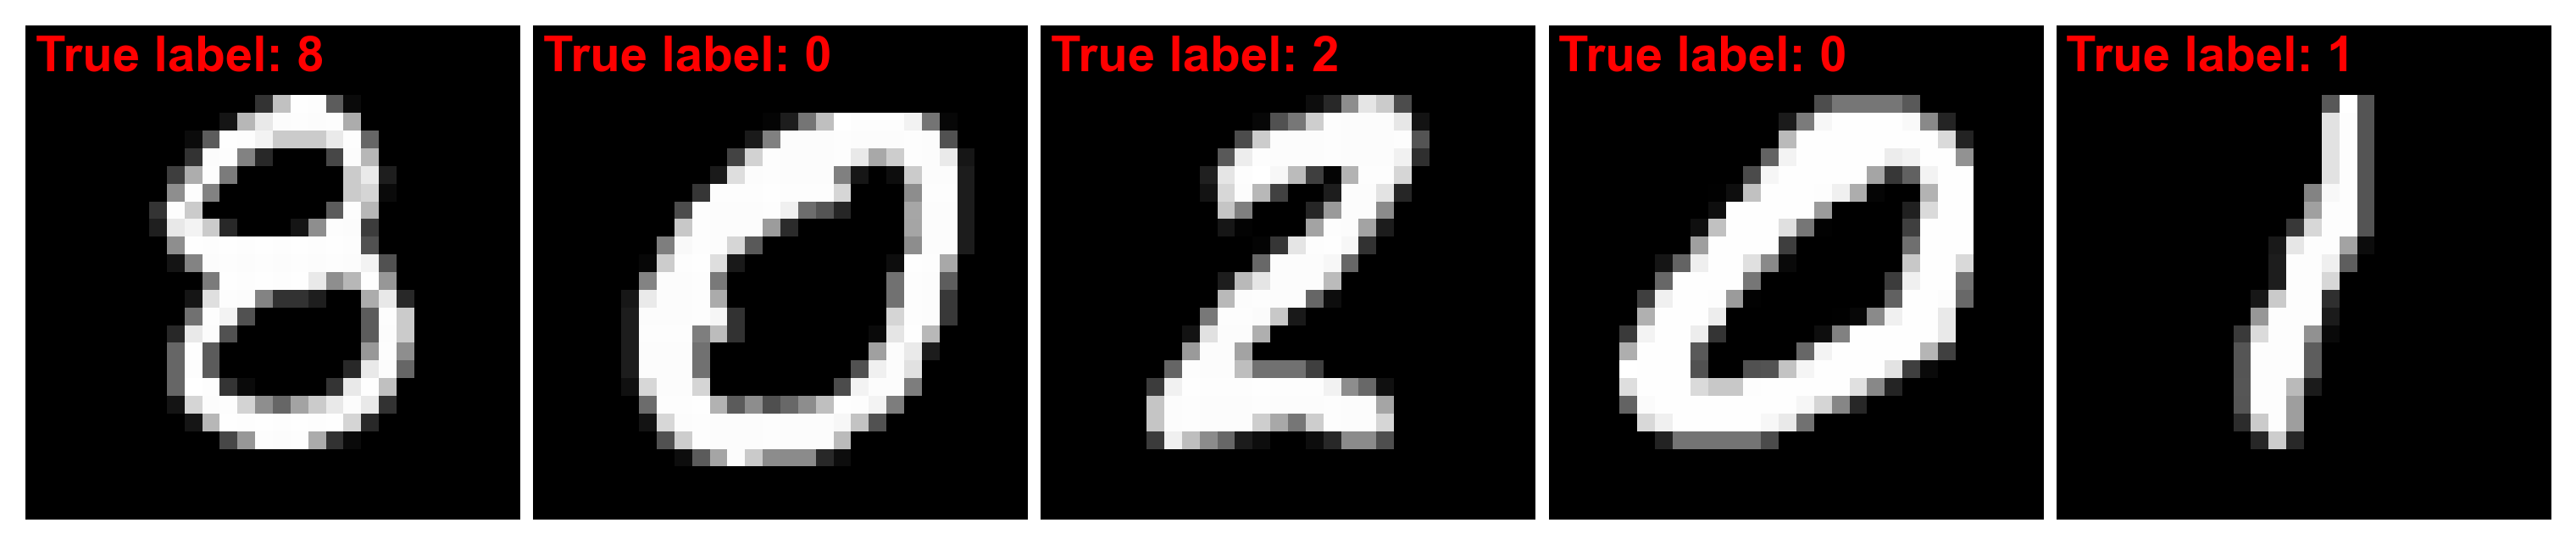

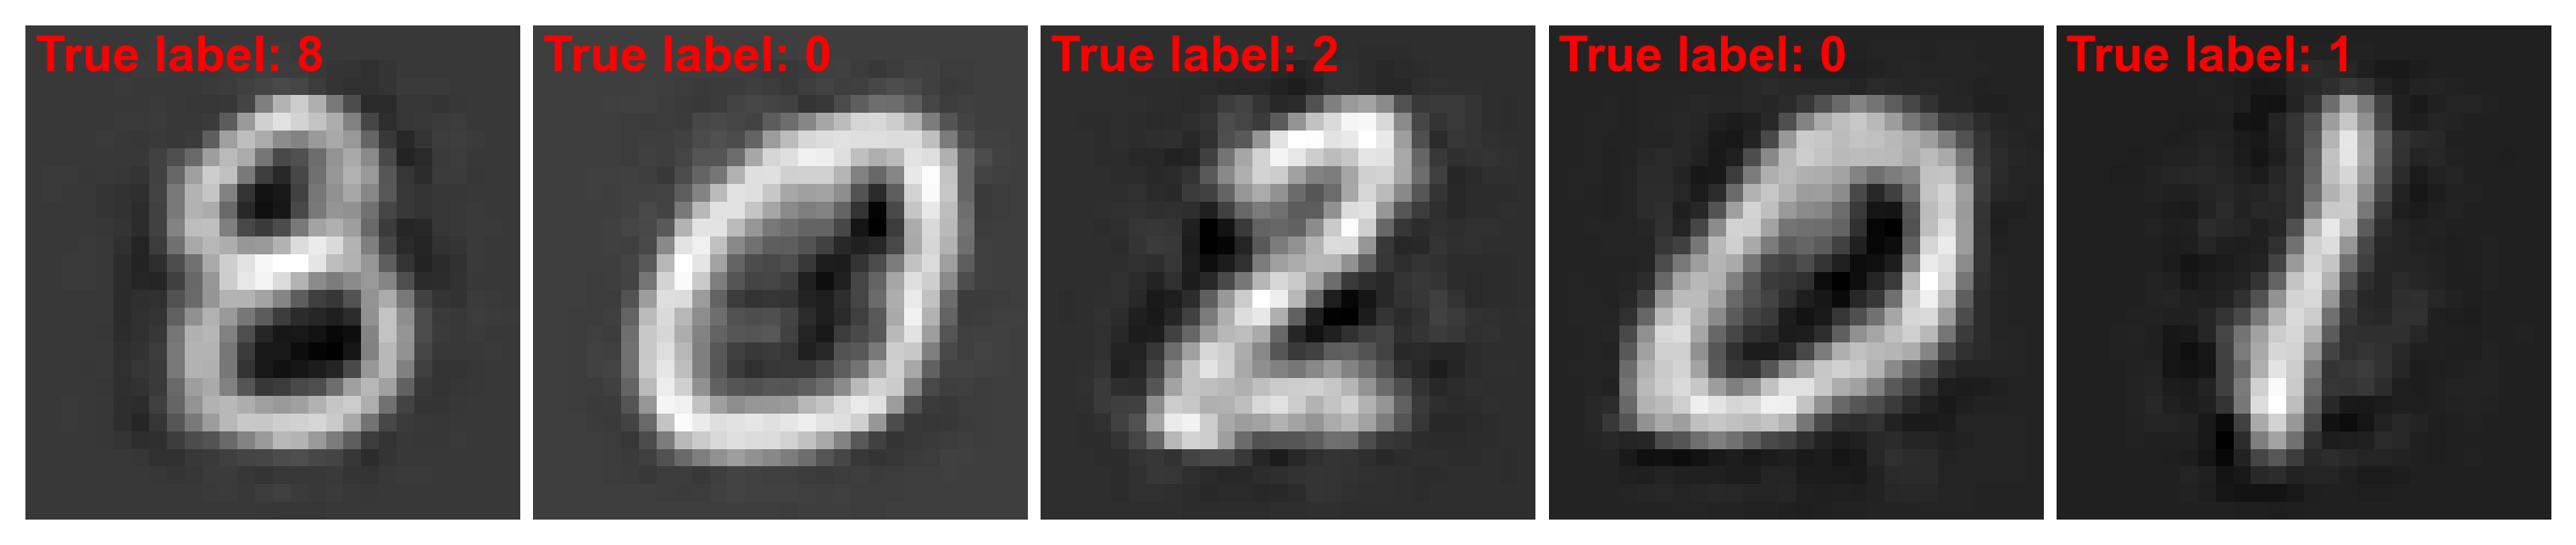

In [80]:
N_IMAGES_TO_ROW = 5
indices = None

# Display several digits in one figure for train data
plot_mnist(input_data=matrix_B_final_train,
           num_to_display=N_IMAGES_TO_ROW,
           save_path=PATH_FIGURES,
           true_labels=matrix_B_labels_train,
           input_indices=indices,
           label_data='final_train',
           show_images=True)

plot_mnist(input_data=matrix_B_calculated_train,
           num_to_display=N_IMAGES_TO_ROW,
           save_path=PATH_FIGURES,
           true_labels=matrix_B_labels_train,
           input_indices=indices,
           label_data='calculated_train',
           show_images=True)


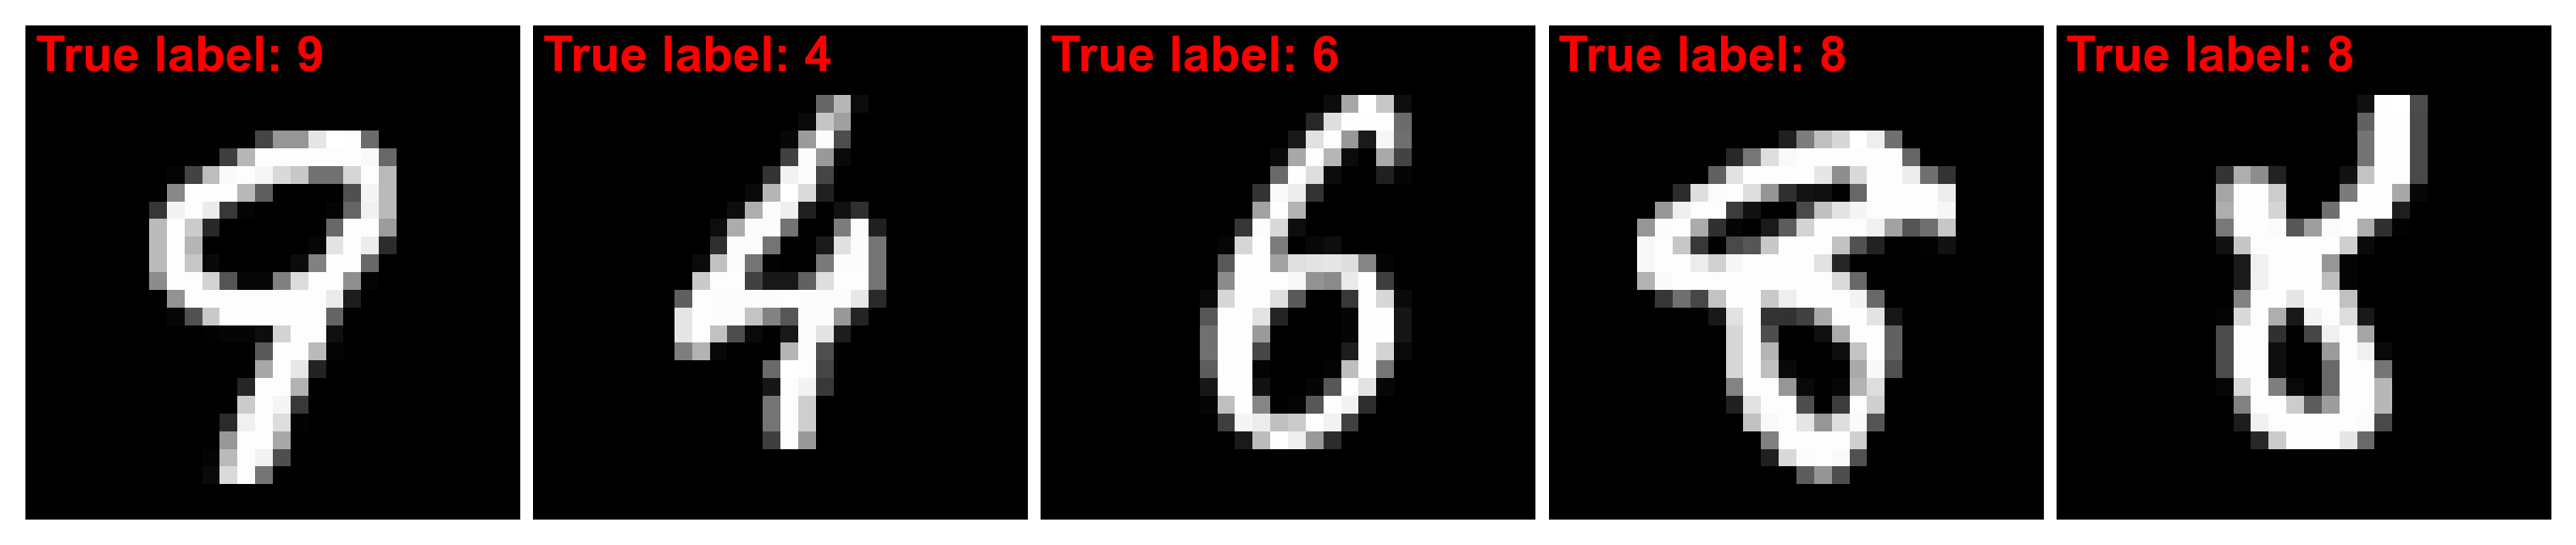

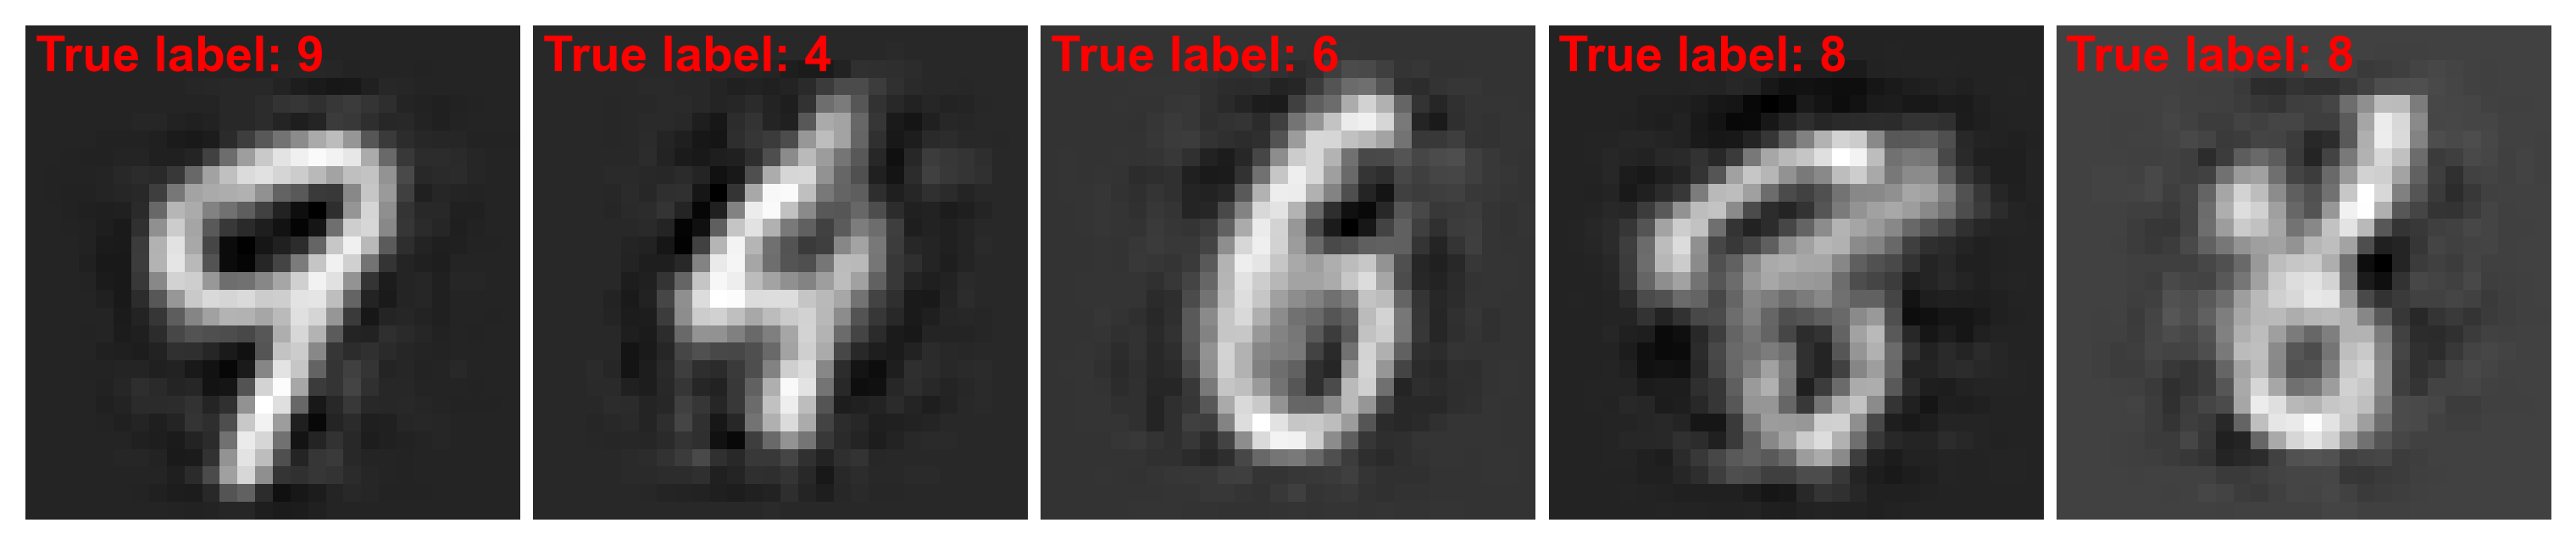

In [81]:
# Display several digits in one figure for test data
plot_mnist(input_data=matrix_B_final_test,
           num_to_display=N_IMAGES_TO_ROW,
           save_path=PATH_FIGURES,
           true_labels=matrix_B_labels_test,
           input_indices=indices,
           label_data='final_test',
           show_images=True)

plot_mnist(input_data=matrix_B_calculated_test,
           num_to_display=N_IMAGES_TO_ROW,
           save_path=PATH_FIGURES,
           true_labels=matrix_B_labels_test,
           input_indices=indices,
           label_data='calculated_test',
           show_images=True)

In [82]:
N_IMAGES_TO_SAVE = 50  # Total number of images to iterate through
N_IMAGES_TO_DISPLAY = 1 # Number of images to display in one figure

for digit_item in range(N_IMAGES_TO_SAVE):
    # Correctly extract the label for the current digit_item from the DataFrame
    digit_label = matrix_B_labels_train.iloc[digit_item].item() if isinstance(matrix_B_labels_train, pd.DataFrame) else matrix_B_labels_train[digit_item]

    # Convert the digit_label to a string and strip whitespace
    digit_label = str(digit_label).strip()

    # Call the plot_mnist function for each digit with the label in the file name
    plot_mnist(input_data=matrix_B_final_train,
               num_to_display=N_IMAGES_TO_DISPLAY,
               save_path=PATH_FIGURES_SEPARATE,
               true_labels=matrix_B_labels_train,
               input_indices=[digit_item],  # Select the current digit
               label_data=f'final_train_{digit_label}_{digit_item}', # Use the digit's label in the file title
               show_images=False)

for digit_item in range(N_IMAGES_TO_SAVE):
    # Correctly extract the label for the current digit_item from the DataFrame
    digit_label = matrix_B_labels_train.iloc[digit_item].item() if isinstance(matrix_B_labels_train, pd.DataFrame) else matrix_B_labels_train[digit_item]

    # Convert the digit_label to a string and strip whitespace
    digit_label = str(digit_label).strip()

    # Call the plot_mnist function for each digit with the label in the file name
    plot_mnist(input_data=matrix_B_calculated_train,
               num_to_display=N_IMAGES_TO_DISPLAY,
               save_path=PATH_FIGURES_SEPARATE,
               true_labels=matrix_B_labels_train,
               input_indices=[digit_item],  # Select the current digit
               label_data=f'calculated_train_{digit_label}_{digit_item}',   # Use the digit's label in the file title
               show_images=False) 


In [83]:
for digit_item in range(N_IMAGES_TO_SAVE):
    # Correctly extract the label for the current digit_item from the DataFrame
    digit_label = matrix_B_labels_test.iloc[digit_item].item() if isinstance(matrix_B_labels_test, pd.DataFrame) else matrix_B_labels_test[digit_item]

    # Convert the digit_label to a string and strip whitespace
    digit_label = str(digit_label).strip()

    # Call the plot_mnist function for each digit with the label in the file name
    plot_mnist(input_data=matrix_B_final_test,
               num_to_display=N_IMAGES_TO_DISPLAY,
               save_path=PATH_FIGURES_SEPARATE,
               true_labels=matrix_B_labels_test,
               input_indices=[digit_item],  # Select the current digit
               label_data=f'final_test_{digit_label}_{digit_item}',
               show_images=False)  # Use the digit's label in the file title

for digit_item in range(N_IMAGES_TO_SAVE):
    # Correctly extract the label for the current digit_item from the DataFrame
    digit_label = matrix_B_labels_test.iloc[digit_item].item() if isinstance(matrix_B_labels_test, pd.DataFrame) else matrix_B_labels_test[digit_item]

    # Convert the digit_label to a string and strip whitespace
    digit_label = str(digit_label).strip()

    # Call the plot_mnist function for each digit with the label in the file name
    plot_mnist(input_data=matrix_B_calculated_test,
               num_to_display=N_IMAGES_TO_DISPLAY,
               save_path=PATH_FIGURES_SEPARATE,
               true_labels=matrix_B_labels_test,
               input_indices=[digit_item],  # Select the current digit
               label_data=f'calculated_test_{digit_label}_{digit_item}',
               show_images=False)  # Use the digit's label in the file title


### 5.2. Metrics

#### 5.2.1 SSIM

In [167]:
from skimage.metrics import structural_similarity as ssim

def calculate_ssim_table(df1, df2):
    # Check and convert to numpy array if necessary
    table1 = df1 if isinstance(df1, np.ndarray) else df1.to_numpy()
    table2 = df2 if isinstance(df2, np.ndarray) else df2.to_numpy()

    ssim_values = []
    for i in range(table1.shape[0]):
        image1 = table1[i].reshape(28, 28)
        image2 = table2[i].reshape(28, 28)
        ssim_values.append(ssim(image1, image2, data_range=image1.max() - image1.min()))

    # Create a DataFrame and add the average
    ssim_df = pd.DataFrame(ssim_values, columns=['SSIM'])
    ssim_average = ssim_df.mean()
    return ssim_df, ssim_average


In [168]:
my_ssim_df, my_ssim_average = calculate_ssim_table(matrix_B_final_test, matrix_B_calculated_test)

In [169]:
my_ssim_df.to_csv('.\projects_temp-data\my_ssim_df.csv', index=False)

In [170]:
def plot_ssim_histogram(ssim_data, save_path):
    """
    Plots a histogram of SSIM scores.

    Parameters:
    ssim_data (DataFrame): A pandas DataFrame containing SSIM scores in a column named 'SSIM'.
    title (str): Title for the histogram. Default is 'Distribution of SSIM Scores'.
    """
    # Define the figure name and path
    figure_name = 'my_histo_ssim'
    my_save_path = os.path.join(save_path, figure_name + f'.{FIGURE_FORMAT}')

    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)
    
    plt.figure(figsize=(6,4), dpi=300)
    plt.subplots_adjust(left=0.11, right=0.98, top=0.93, bottom=0.12, wspace=0.1, hspace=0.1)
    ax = sns.histplot(data=ssim_data['SSIM'], kde=True, 
                      bins=20, color='lightgreen', edgecolor='darkolivegreen')
    ax.lines[0].set_color('darkseagreen')
    plt.xticks(fontsize=12, fontweight='bold', color='#333333')
    plt.yticks(fontsize=12, fontweight='bold', color='#333333')
    plt.xlabel('SSIM Score', fontsize=14, fontweight='bold', color='#333333')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='#333333')
    plt.title(label='Distribution of SSIM Scores', fontsize=16, fontweight='bold')
    plt.grid(True)
    
    plt.savefig(my_save_path)
    plt.show()

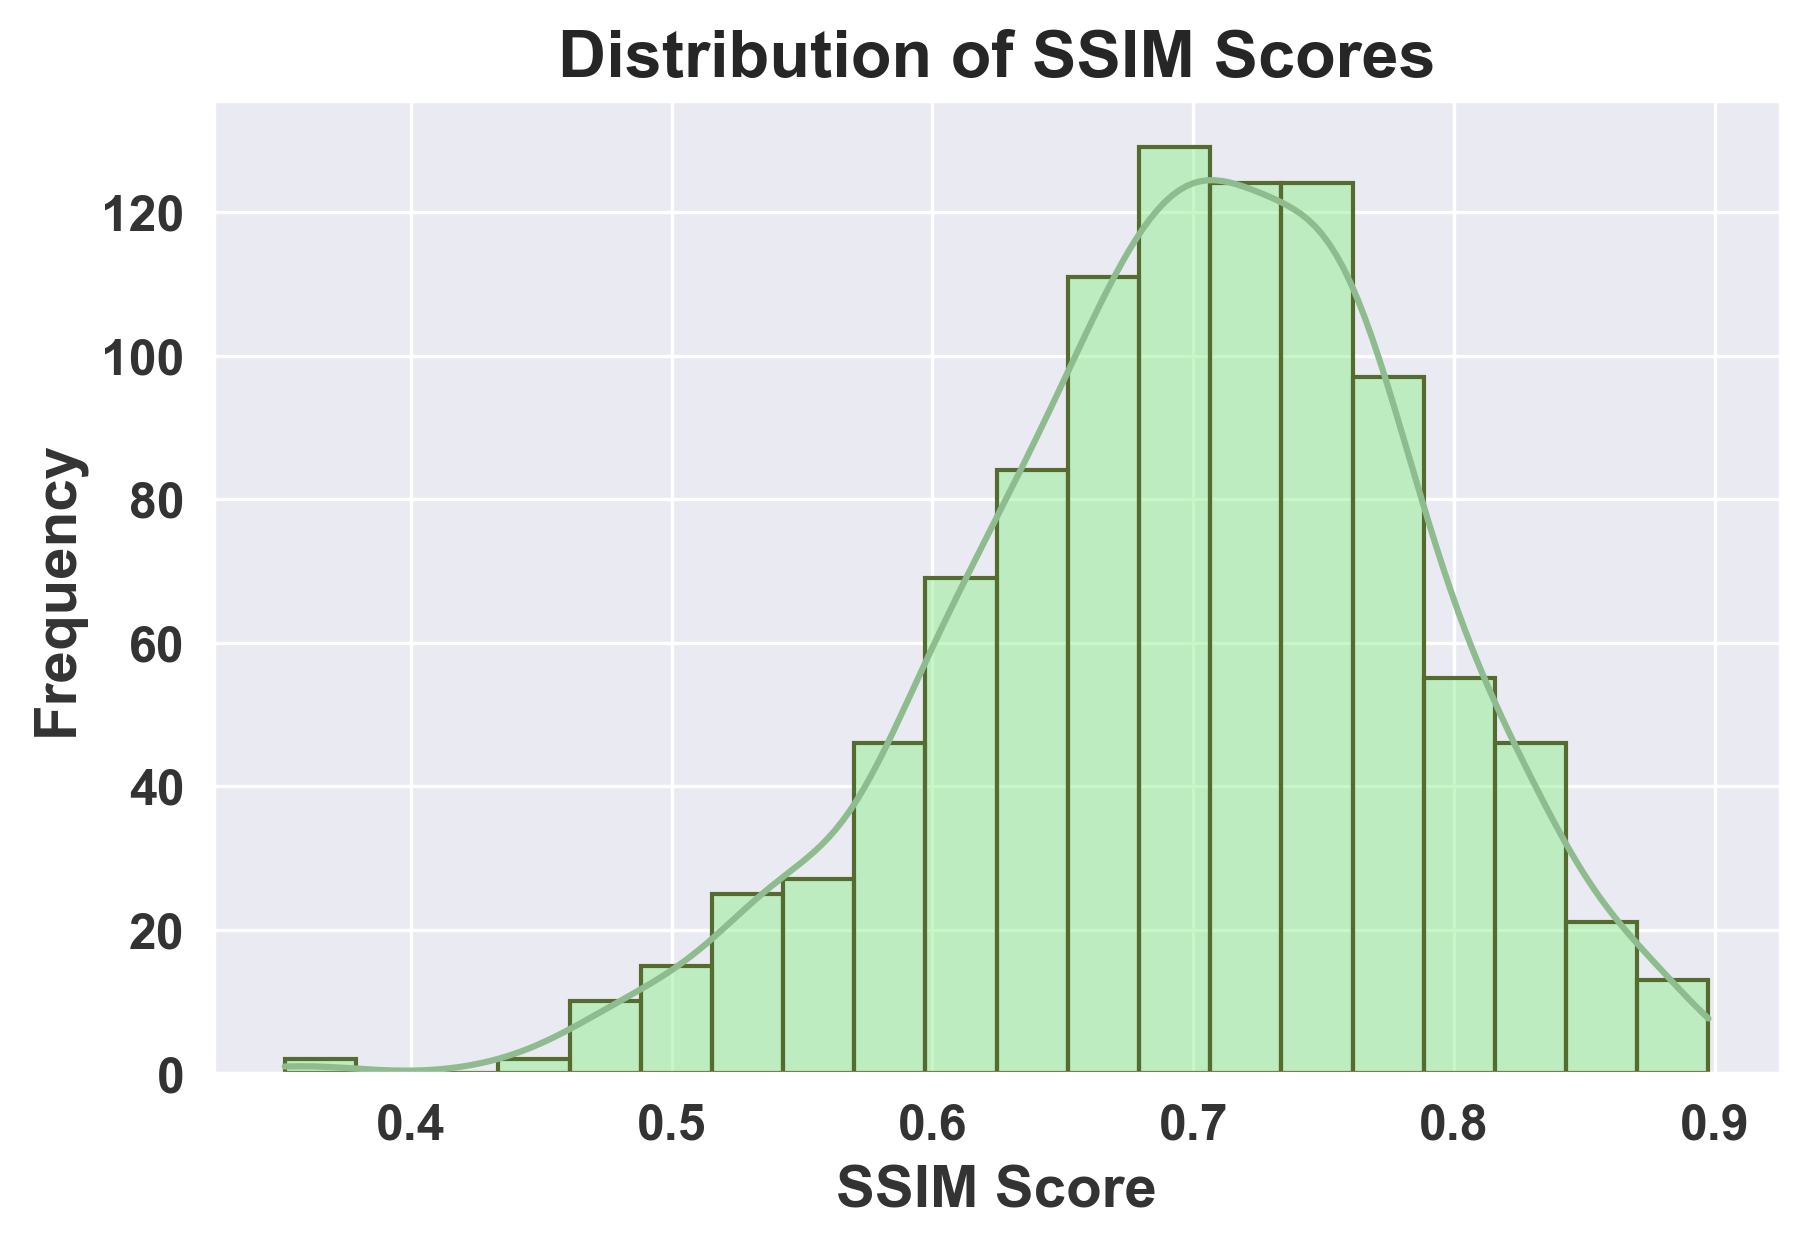

In [171]:
plot_ssim_histogram(my_ssim_df, PATH_FIGURES)

In [172]:
def plot_ssim_boxplot(ssim_data, save_path):
    """
    Plots a box plot of SSIM scores.

    Parameters:
    ssim_data (DataFrame): A pandas DataFrame containing SSIM scores in a column named 'SSIM'.
    title (str): Title for the box plot. Default is 'Distribution of SSIM Scores'.
    """
    # Define the figure name and path
    figure_name = 'my_box_plot_ssim'
    my_save_path = os.path.join(save_path, figure_name + f'.{FIGURE_FORMAT}')

    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    plt.figure(figsize=(6,4), dpi=300)
    plt.subplots_adjust(left=0.11, right=0.98, top=0.93, bottom=0.12, wspace=0.1, hspace=0.1)
    ax = sns.boxplot(data=ssim_data['SSIM'], color='lightgreen')
    plt.xticks(fontsize=12, fontweight='bold', color='#333333')
    plt.yticks(fontsize=12, fontweight='bold', color='#333333')
    plt.xlabel('SSIM Score', fontsize=14, fontweight='bold', color='#333333')
    plt.ylabel('Value', fontsize=14, fontweight='bold', color='#333333')
    plt.title(label='Distribution of SSIM Scores', fontsize=16, fontweight='bold')
    plt.grid(True)

    plt.savefig(my_save_path)
    plt.show()


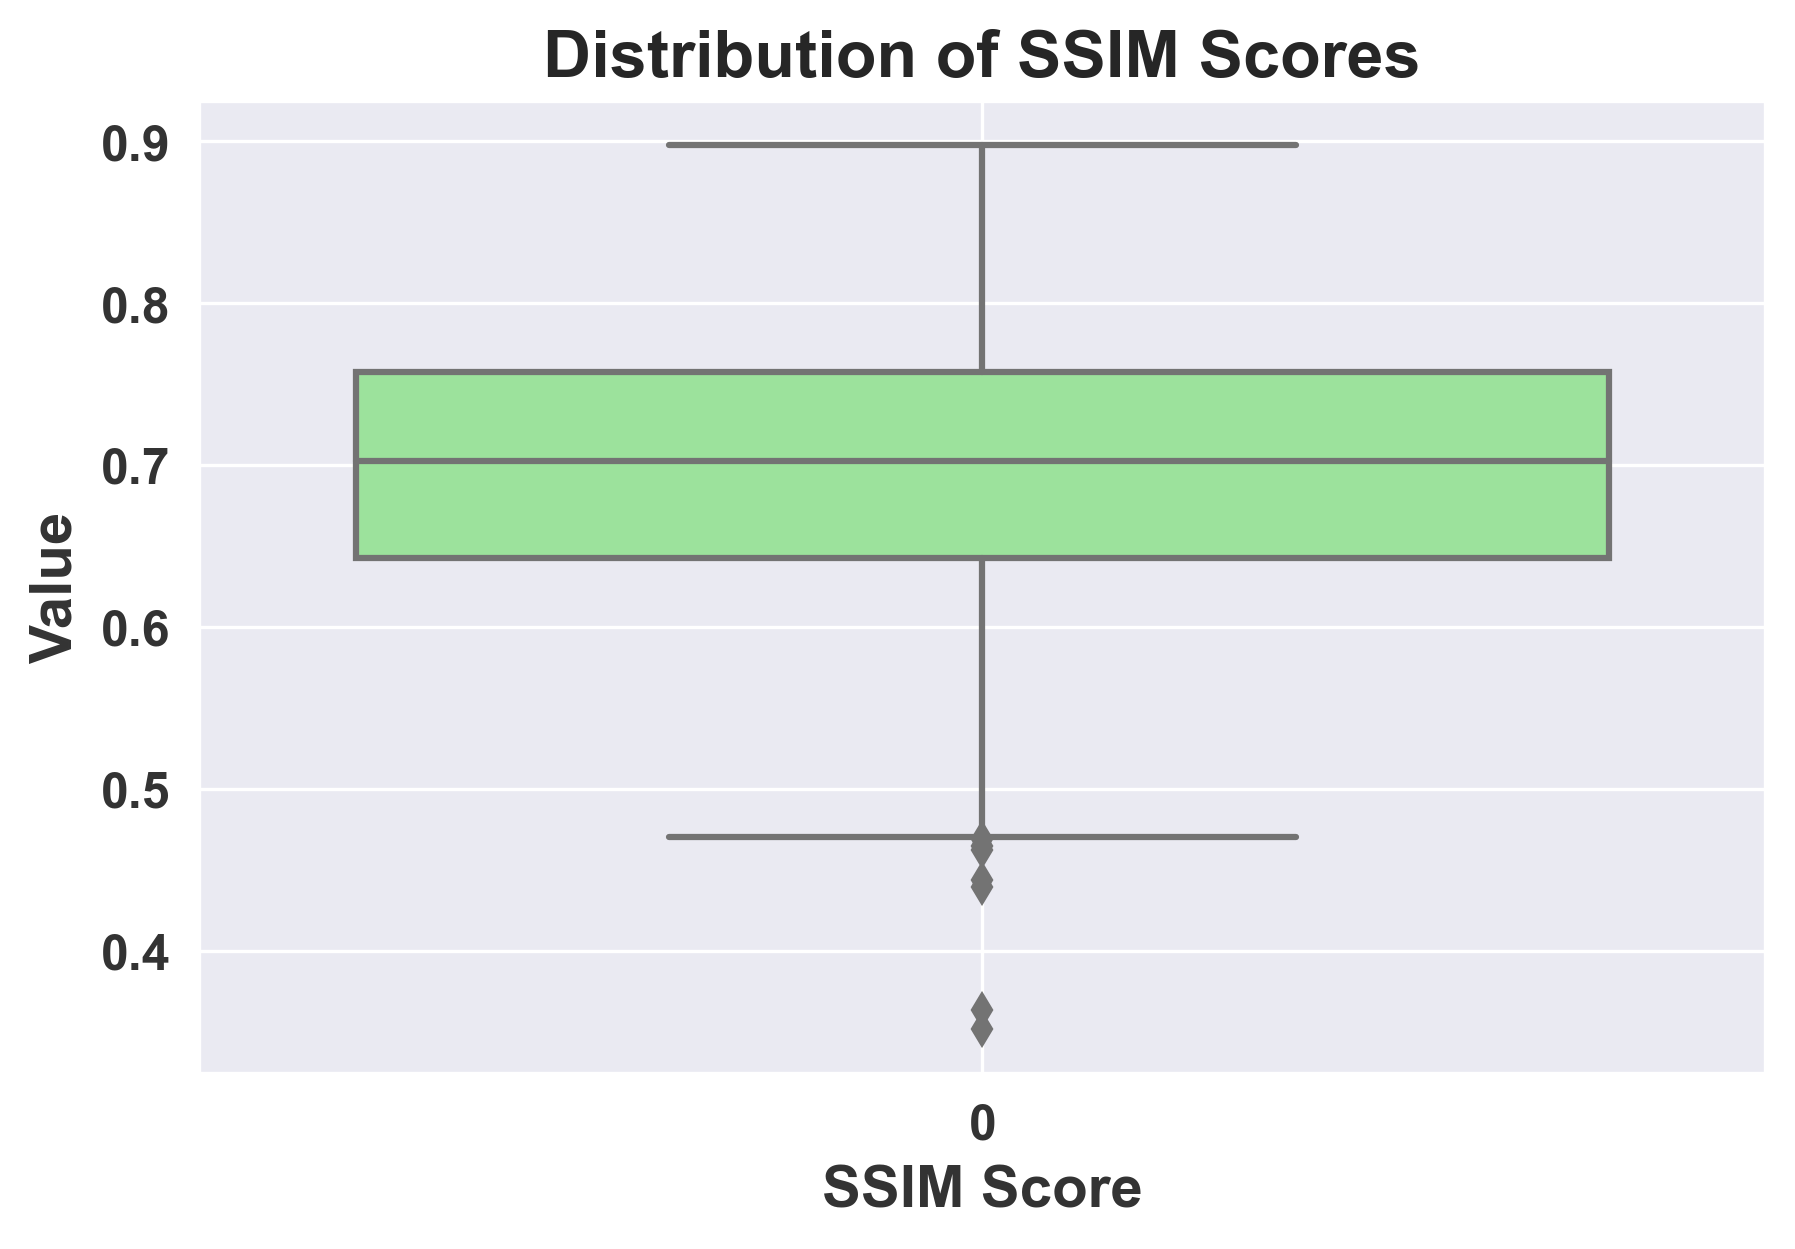

In [173]:
plot_ssim_boxplot(my_ssim_df, PATH_FIGURES)

#### 5.2.2. PSNR

In [174]:
from skimage.metrics import peak_signal_noise_ratio as psnr

def calculate_psnr_table(df1, df2):
    # Check and convert to numpy array if necessary
    table1 = df1 if isinstance(df1, np.ndarray) else df1.to_numpy()
    table2 = df2 if isinstance(df2, np.ndarray) else df2.to_numpy()

    psnr_values = []
    for i in range(table1.shape[0]):
        image1 = table1[i].reshape(28, 28)
        image2 = table2[i].reshape(28, 28)
        psnr_values.append(psnr(image1, image2, data_range=image1.max() - image1.min()))

    # Create a DataFrame and add the average
    psnr_df = pd.DataFrame(psnr_values, columns=['PSNR'])
    psnr_average = psnr_df.mean()
    return psnr_df, psnr_average


In [175]:
my_psnr_df, my_psnr_average = calculate_psnr_table(matrix_B_final_test, matrix_B_calculated_test)

In [176]:
my_psnr_df.to_csv('.\projects_temp-data\my_psnr_df.csv', index=False)

In [177]:
def plot_psnr_histogram(psnr_data, save_path):
    """
    Plots a histogram of PSNR scores.

    Parameters:
    psnr_data (DataFrame): A pandas DataFrame containing PSNR scores in a column named 'PSNR'.
    title (str): Title for the histogram. Default is 'Distribution of PSNR Scores'.
    """
    # Define the figure name and path
    figure_name = 'my_histo_psnr'
    my_save_path = os.path.join(save_path, figure_name + f'.{FIGURE_FORMAT}')

    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    plt.figure(figsize=(6,4), dpi=300)
    plt.subplots_adjust(left=0.11, right=0.98, top=0.93, bottom=0.12, wspace=0.1, hspace=0.1)
    ax = sns.histplot(data=psnr_data['PSNR'], kde=True,
                      bins=30, color='skyblue', edgecolor='steelblue')
    ax.lines[0].set_color('cornflowerblue')
    plt.xticks(fontsize=12, fontweight='bold', color='#333333')
    plt.yticks(fontsize=12, fontweight='bold', color='#333333')
    plt.xlabel('PSNR Score', fontsize=14, fontweight='bold', color='#333333')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='#333333')
    plt.title(label='Distribution of PSNR Scores', fontsize=16, fontweight='bold')
    plt.grid(True)

    plt.savefig(my_save_path)
    plt.show()

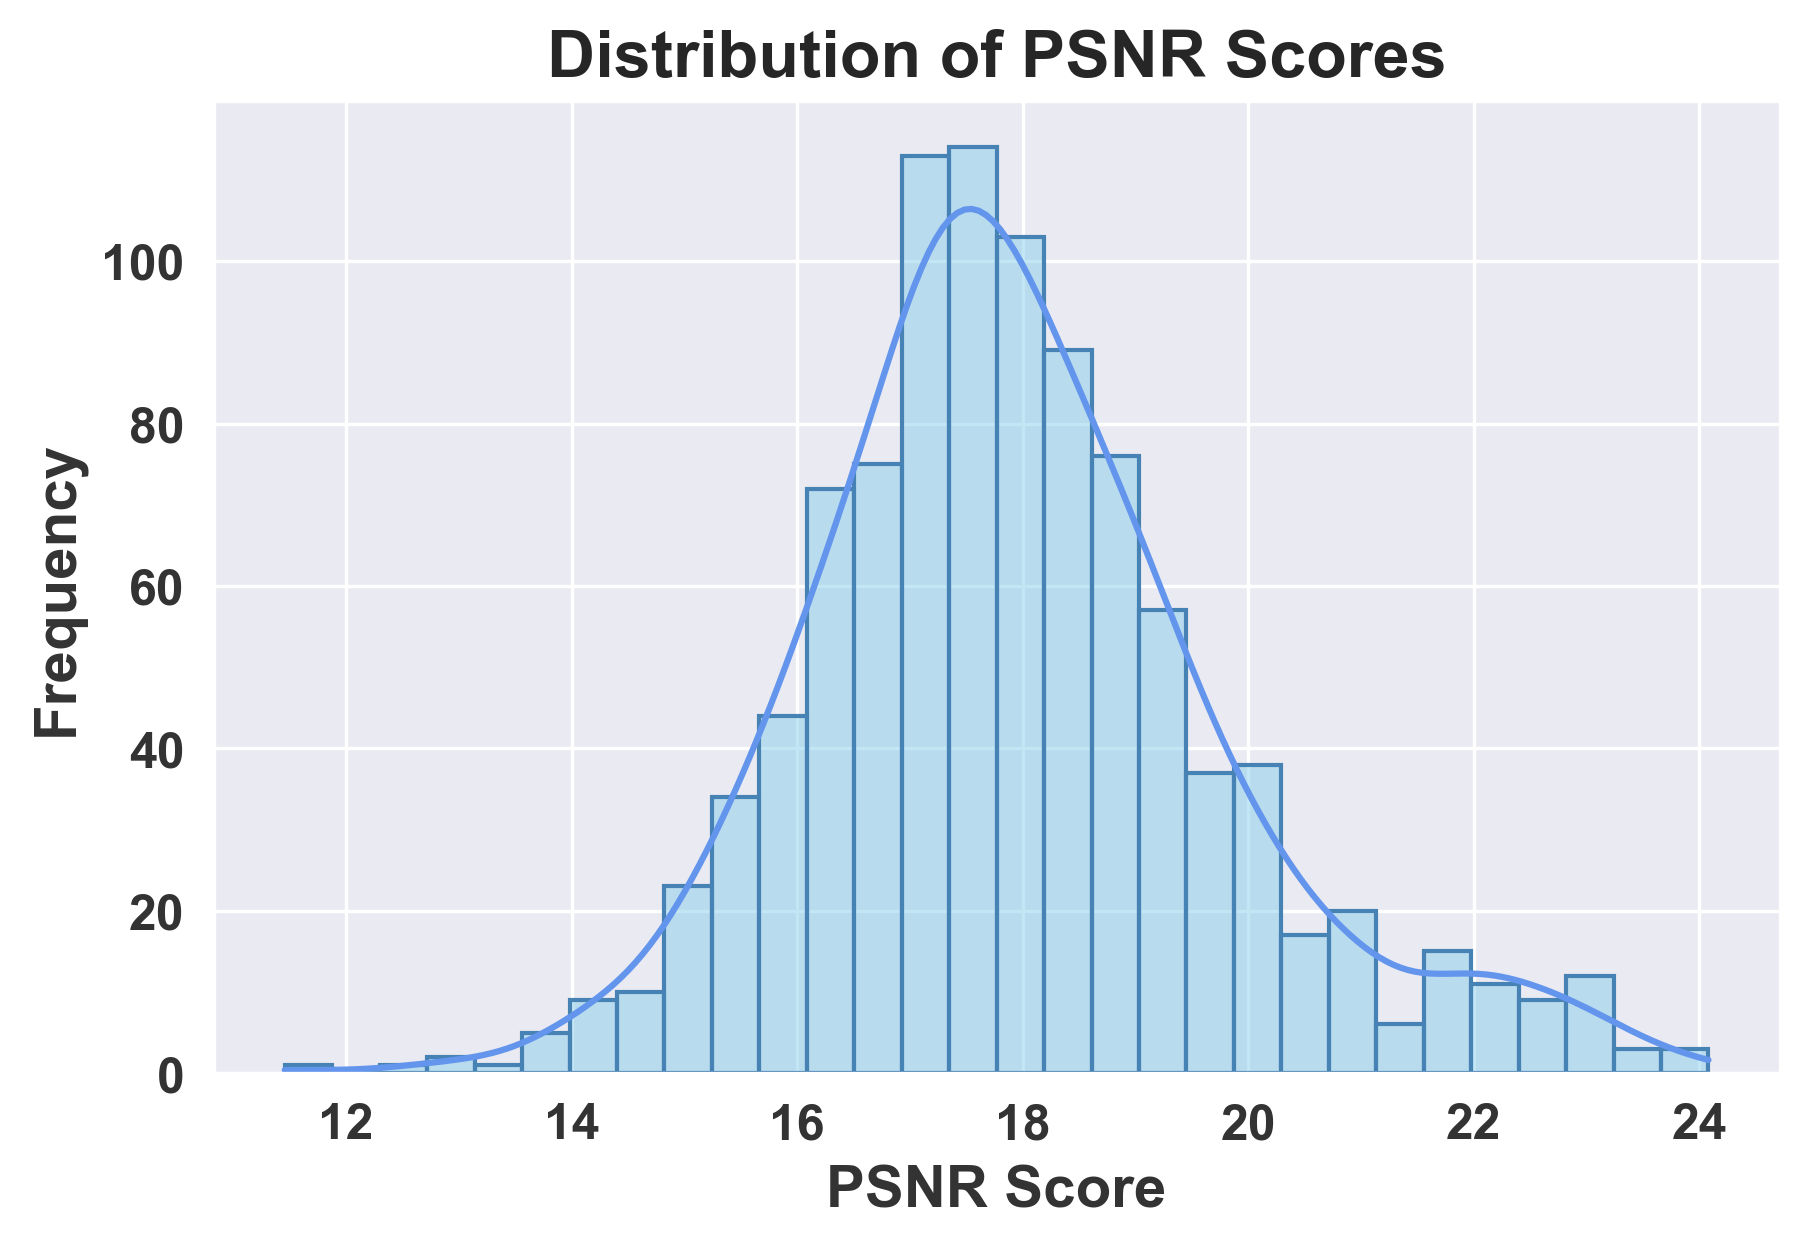

In [178]:
plot_psnr_histogram(my_psnr_df, PATH_FIGURES)

In [179]:
def plot_psnr_boxplot(psnr_data, save_path):
    """
    Plots a box plot of PSNR scores.

    Parameters:
    psnr_data (DataFrame): A pandas DataFrame containing PSNR scores in a column named 'PSNR'.
    title (str): Title for the box plot. Default is 'Distribution of PSNR Scores'.
    """
    # Define the figure name and path
    figure_name = 'my_box_plot_psnr'
    my_save_path = os.path.join(save_path, figure_name + f'.{FIGURE_FORMAT}')

    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    plt.figure(figsize=(6,4), dpi=300)
    plt.subplots_adjust(left=0.11, right=0.98, top=0.93, bottom=0.12, wspace=0.1, hspace=0.1)
    ax = sns.boxplot(data=psnr_data['PSNR'], color='skyblue')
    plt.xticks(fontsize=12, fontweight='bold', color='#333333')
    plt.yticks(fontsize=12, fontweight='bold', color='#333333')
    plt.xlabel('PSNR Score', fontsize=14, fontweight='bold', color='#333333')
    plt.ylabel('Value', fontsize=14, fontweight='bold', color='#333333')
    plt.title(label='Distribution of PSNR Scores', fontsize=16, fontweight='bold')
    plt.grid(True)

    plt.savefig(my_save_path)
    plt.show()


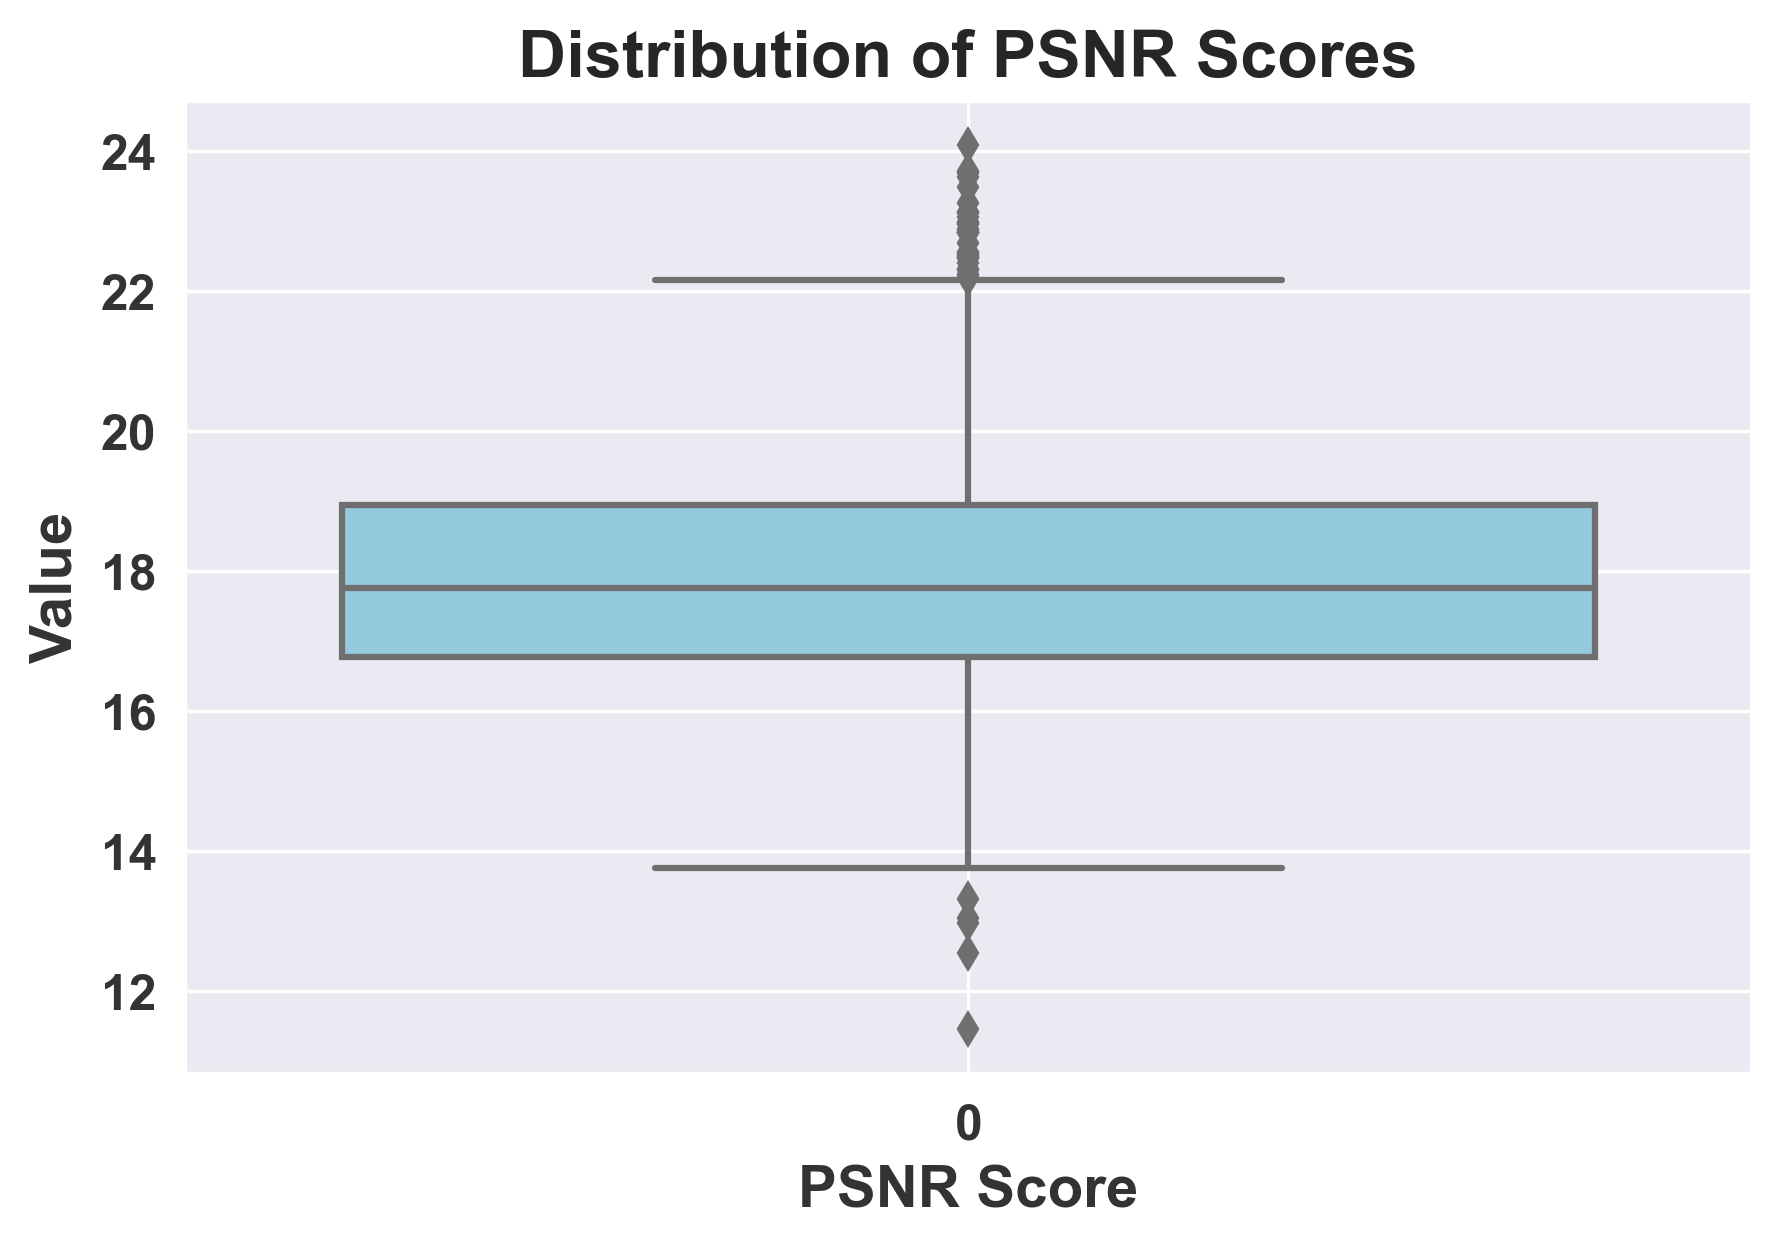

In [180]:
plot_psnr_boxplot(my_psnr_df, PATH_FIGURES)